#Purpose

The purpose of this notebook is to use IBM Watson's text to speech AI to create mp3 files based off text. This is useful for increasing accessibility for users with different abilities, providing audio options to avoid distracted driving, or automating customer service interactions to increase efficiencies.

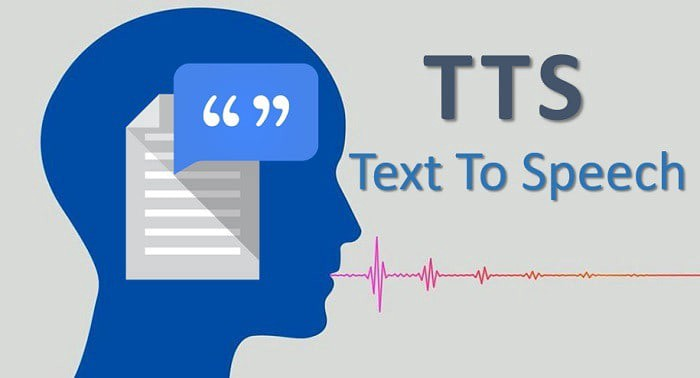

In [1]:
import IPython
url = 'https://raw.githubusercontent.com/kristadofo1/TTSproject/main/ttsim.jpeg'
IPython.display.Image(url, width = 250)

**All files will be available to download after the program is ran**

#Import Libraries

In [2]:
!pip install ibm_watson

     |████████████████████████████████| 389kB 5.8MB/s 
     |████████████████████████████████| 204kB 48.2MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.1.0-cp37-none-any.whl size=375439 sha256=1a0a86483023c84b40c22ea355f32c56490f7cb130ad70b6ff6f3619175fab32
  Stored in directory: /root/.cache/pip/wheels/49/6d/cf/1d91261b96363da78bf9b02699fd2262e6b5dad179500690c1
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.5.2-cp37-none-any.whl size=56741 sha256=9fc82f4f27b7d1fa62262cac073577d217af6dc1f0118e2ea497b90dd3360f7c
  Stored in directory: /root/.cache/pip/wheels/19/1b/6e/d9534e016367801140a07c6718e68836e10b6ba574263ee03c
Successfully built ibm-watson ibm-cloud-sdk-core


In [3]:
from ibm_watson import TextToSpeechV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

#Service Setup

This is my personal server being run via cloud computing at a IBM Watson server in Dallas, Texas.

In [4]:
url = 'https://api.us-south.text-to-speech.watson.cloud.ibm.com/instances/5a605716-b053-44c6-b4b9-1bfda5b77046'
api_key = 'SMSCtLEK4JuVeweBtF-LRi_6I589uveXUK8dWIs9JhBO'

In [5]:
authenticator = IAMAuthenticator(api_key)
tts = TextToSpeechV1(authenticator=authenticator)
tts.set_service_url(url)

#Convert to speech from code

In [6]:
with open('./speech.mp3', 'wb') as audio_file:
    res = tts.synthesize('It is four in the morning and I can not fall asleep', accept='audio/mp3', voice='en-US_AllisonV3Voice').get_result()
    audio_file.write(res.content)

#Convert to speech from a text file (url)

In [7]:
import urllib3

http = urllib3.PoolManager()
response = http.request('GET', 'https://raw.githubusercontent.com/kristadofo1/TTSproject/main/humpty-dumpty.txt')
data = response.data.decode('utf-8')
print(data)

Humpty Dumpty

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.



/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [8]:
with open('./humpty.mp3', 'wb') as audio_file:
    res2 = tts.synthesize(data, accept='audio/mp3', voice='en-GB_JamesV3Voice').get_result()
    audio_file.write(res2.content)

# Convert to Spanish

In [9]:
spanishspeech = 'es-LA_SofiaV3Voice'

with open('./spanishhumpty.mp3', 'wb') as audio_file:
    res3 = tts.synthesize(data, accept='audio/mp3', voice = spanishspeech).get_result()
    audio_file.write(res3.content)